In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [4]:
X, y = datasets.make_moons(200, noise=0.15)

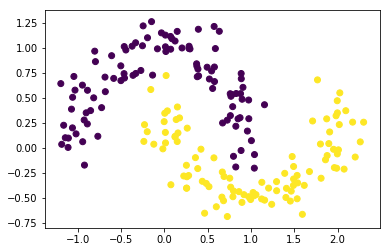

In [5]:
plt.scatter(X[:,0], X[:,1],c=y)

In [6]:
# Our Goal is to classify the data

In [7]:
X.shape

(200, 2)

Defining Hyper parameter<br>
Binary Cross Entroy : Used when the number of the output is 1.<br>
Cross Entropy : Used when the number of the output is more than 1.

In [8]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = .001
lambda_ = 0.01

In [9]:
model_dict = {
    'W1':W1,
    'b1':b1,
    'W2':W2,
    'b2':b2,
}

NameError: name 'W1' is not defined

In [ ]:
def retrieve(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [ ]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, dim=1, keepdims=True)
    return z1, a1, softmax

In [ ]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    # First we will apply regularization
    m = np.zeros(200)
    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)   # Softmax
    softmax_loss = np.sum(log_prob) # softmax loss
    reg_loss = lambda_ / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss = softmax_loss + reg_loss
    return loss / y.shape[0]

In [ ]:
def predict(x, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, dim=1, keepdims=True) # (200,2) maxtrix
    return np.argmax(softmax)

# Equation for backpropagation

<img src="./img/BackPropEquation.png"/>

<img src="./img/eq1.svg" style="float:left"/>


<img src="./img/eq2.svg" style="float:left"/>

<img src="./img/derivative.png"/>

<img src="./img/eq4.svg" style="float:left"/>


Recall that our labels are in the form of a one-hot vector: (ex. If class 1 is correct, then the corresponding label is [1,0], if class 2 is correct, then the corresponding label is [0,1]).

If class one is the actual prediction: $\tilde{y}_{1} = 1 $, then we have:

<img src="./img/eq5.svg" style="float:left"/>

<img src="./img/eq6.svg" style="float:left"/>

<img src="./img/eq7.svg" style="float:left"/>

<img src="./img/eq8.svg" style="float:left"/>

<img src="./img/eq9.svg" style="float:left"/>

<img src="./img/eq10.svg" style="float:left"/>

In [ ]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epcohs):
        W1, b1, W2, b2 = retrieve(model_dict)
        z1, a1, probs = forward(x, model_dict)
        # First apply delta 3 application
        delta3 = np.copy(probs)
        # We cannot simply just do delta3 = delta3 - 1, becuase we only wanna calculate it on the correct index
        delta3[range(x.shape[0]),y] -= 1 # extract the only correct indexes (200,2) delta3 = probs - 1
        dW2 = (a1.T).dot(delta3) # a1 : (3,200) dot (200,2) --> (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True) # (1,2) if we dont keep the dimension, it is going to be just 1 dimension
        delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(data2, axis=0)
        # Add the regularization terms
        dW2 += lambda_ * np.sum(W2) 
        dW1 += lambda_ * np.sum(W1)
        # Update the weights
        W1 += -learning_rate * dW1                 # W = W + (-lr * gradient)
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {
            'W1':W1,
            'b1':b1,
            'W2':W2,
            'b2':b2,
        }
        # Print the loss every 50 epochs
        if i % 50 == 0:
            print("Loss at epoch {} is : {:.3f}".format(i, loss(props, y, model_dict)))
            
    return model_dict

In [ ]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model